# 합성곱 신경망(Convolutional Neural Networks, CNNs)

- 이미지 인식, 음성 인식 등에 자주 사용되는데,  
  특히, 이미지 인식 분야에서 거의 모든 딥러닝 기술에 사용

<br>

## 컨볼루션 신경망의 등장
- 1989년 얀 르쿤(Yann LeCun) 교수의 논문에서 발표

  - 필기체 인식에서 의미가 있었지만 범용화하는데에는 무리

- 1998년, "Gradient-Based Learning Applied to Document Recognition"이라는 논문에서 LeNet-5 제시

- 합성곱 층(convolution layer), 풀링 층(pooling layer) 소개
  <br>

  <img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>


## 완전연결계층과의 차이
- 완전연결계층(Fully-Connected Layer)은 이미지와 같은 데이터의 형상(3차원)을 무시함  

- 모든 입력데이터를 동등하게 취급  
  즉, **데이터의 특징을 잃어버리게 됨**

- 컨볼루션층(convolution layer)은 <u>**이미지 픽셀 사이의 관계를 고려**</u>

- 완전연결계층은 공간정보를 손실하지만, 컨볼루션층은 공간정보를 유지  
  - 이미지와 같은 2차원(흑백) 또는 3차원(컬러)의 형상을 유지

  - 공간정보를 유지하기 때문에 완전연결계층에 비해 적은 수의 파라미터를 요구


## 컨볼루션 신경망 구조 예시

<img src="https://www.oreilly.com/library/view/neural-network-projects/9781789138900/assets/c38754ca-f2ea-425a-b7a6-1fe0f2f5074e.png" width="600">

<sub>출처: https://www.oreilly.com/library/view/neural-network-projects/9781789138900/8e87ad66-6de3-4275-81a4-62b54436bf16.xhtml</sub>



## 합성곱 연산
- 필터(filter) 연산
  - 입력 데이터에 필터를 통한 어떠한 연산을 진행
  
  - **필터에 대응하는 원소끼리 곱하고, 그 합을 구함**

  - 연산이 완료된 결과 데이터를 **특징 맵(feature map)**이라 부름

- 필터(filter)
  - 커널(kernel)이라고도 칭함
  
  - 흔히 사진 어플에서 사용하는 '이미지 필터'와 비슷한 개념

  - 필터의 사이즈는 "거의 항상 홀수"
    - 짝수이면 패딩이 비대칭이 되어버림
  
    - 왼쪽, 오른쪽을 다르게 주어야함
  
    - 중심위치가 존재, 즉 구별된 하나의 픽셀(중심 픽셀)이 존재

  - 필터의 학습 파라미터 개수는 입력 데이터의 크기와 상관없이 일정  
    따라서, 과적합을 방지할 수 있음

  <br>
  <img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif">

  <sub>출처: https://www.philgineer.com/2021/02/cnn-5.html</sub>


- 연산 시각화
  <img src="https://www.researchgate.net/profile/Ihab_S_Mohamed/publication/324165524/figure/fig3/AS:611103423860736@1522709818959/An-example-of-convolution-operation-in-2D-2.png" width="500">

  <sub>출처: https://www.researchgate.net/figure/An-example-of-convolution-operation-in-2D-2_fig3_324165524</sub>


- 일반적으로, 합성곱 연산을 한 후의 데이터 사이즈는  
  ### $\quad (n-f+1) \times (n-f+1)$
    $n$: 입력 데이터의 크기  
    $f$: 필터(커널)의 크기


  <img src="https://miro.medium.com/max/1400/1*Fw-ehcNBR9byHtho-Rxbtw.gif" width="400">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>
  
  위 예에서 입력 데이터 크기($n$)는 5, 필터의 크기($k$)는 3이므로  
  출력 데이터의 크기는 $(5 - 3 + 1) = 3$


## 패딩(padding)과 스트라이드(stride)
- 필터(커널) 사이즈과 함께 **입력 이미지와 출력 이미지의 사이즈를 결정**하기 위해 사용

- 사용자가 결정할 수 있음



### 패딩
- 입력 데이터의 주변을 특정 값으로 채우는 기법
  - 주로 0으로 많이 채움

  <img src="https://miro.medium.com/max/395/1*1okwhewf5KCtIPaFib4XaA.gif" width="300">

- 출력 데이터의 크기
  ### $\quad (n+2p-f+1) \times (n+2p-f+1)$

  위 그림에서, 입력 데이터의 크기($n$)는 5, 필터의 크기($f$)는 4, 패딩값($p$)은 2이므로    
  출력 데이터의 크기는 ($5 + 2\times 2 - 4 + 1) = 6$

### 'valid' 와 'same'
- 'valid'
  - 패딩을 주지 않음
  - padding=0 (0으로 채워진 테두리가 아니라 패딩을 주지 않는다는 의미)

- 'same'
  - 패딩을 주어 입력 이미지의 크기와 연산 후의 이미지 크기를 같게함

  - 만약, 필터(커널)의 크기가 $k$ 이면,  
    패딩의 크기는 $p = \frac{k-1}{2}$ (단, <u>stride=1)</u>



### 스트라이드
- 필터를 적용하는 간격을 의미

- 아래는 그림의 간격 2

  <img src="https://miro.medium.com/max/294/1*BMngs93_rm2_BpJFH2mS0Q.gif">


## 출력 데이터의 크기

## $\qquad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\qquad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 입력 크기 : $(H, W)$

- 필터 크기 : $(FH, FW)$

- 출력 크기 : $(OH, OW)$

- 패딩, 스트라이드 : $P, S$

- (주의) 
  - 위 식의 값에서 $\frac{H + 2P - FH}{S}$ 또는 $\frac{W + 2P - FW}{S}$가 정수로 나누어 떨어지는 값이어야 함
  - 만약, 정수로 나누어 떨어지지 않으면  
    패딩, 스트라이드값을 조정하여 정수로 나누어 떨어지게 해야함


## 풀링(Pooling)

- 필터(커널) 사이즈 내에서 특정 값을 추출하는 과정

### 맥스 풀링(Max Pooling)
- 가장 많이 사용되는 방법

- 출력 데이터의 사이즈 계산은 컨볼루션 연산과 동일
## $\quad OH = \frac{H + 2P - FH}{S} + 1 $ 
## $\quad OW = \frac{W + 2P - FW}{S} + 1 $ 

- 일반적으로 stride=2, kernel_size=2 를 통해  
  **특징맵의 크기를 <u>절반으로 줄이는 역할</u>**

- 모델이 물체의 주요한 특징을 학습할 수 있도록 해주며,  
  컨볼루션 신경망이 이동 불변성 특성을 가지게 해줌
  - 예를 들어, 아래의 그림에서 초록색 사각형 안에 있는  
    2와 8의 위치를 바꾼다해도 맥스 풀링 연산은 8을 추출

- 모델의 파라미터 개수를 줄여주고, 연산 속도를 빠르게 해줌

  <br>

  <img src="https://cs231n.github.io/assets/cnn/maxpool.jpeg" width="600">

  <sub>출처: https://cs231n.github.io/convolutional-networks/</sub>

### 평균 풀링(Avg Pooling)

- 필터 내의 있는 픽셀값의 평균을 구하는 과정

- 과거에 많이 사용, 요즘은 잘 사용되지 않는다.

- 맥스풀링과 마찬가지로 stride=2, kernel_size=2 를 통해  
  특징 맵의 사이즈를 줄이는 역할

  <img src="https://www.researchgate.net/profile/Juan_Pedro_Dominguez-Morales/publication/329885401/figure/fig21/AS:707709083062277@1545742402308/Average-pooling-example.png" width="600">

  <sub>출처: https://www.researchgate.net/figure/Average-pooling-example_fig21_329885401</sub>

## 합성곱 연산의 의미

## 2차원 이미지에 대한 필터 연산 예시
  - 가장 자리 검출(Edge-Detection)

  - 소벨 필터(Sobel Filter)

    - Horizontal : 가로 방향의 미분을 구하는 필터 역할

    - Vertical : 세로 방향의 미분을 구하는 필터 역할  

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT_ZRkuiCkv0ZEHFiyCp-7Y5bCL0liaYSQ4mg&usqp=CAU" width="350">

  <sub>출처: https://www.cloras.com/blog/image-recognition/</sub>


### modules import

In [4]:
#!pip install opencv-python

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

### util functions

In [6]:
def url_to_image(url, gray = False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype = 'uint8')
    
    if gray == True:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image


# 합성곱연산 함수
def filtered_image(image, filter, output_size):
    filtered_img = np.zeros((output_size, output_size))
    filter_size = filter.shape[0]
    
    for i in range(output_size):
        for j in range(output_size):
            multiply_values = image[i:(i + filter_size), j:(j + filter_size)] * filter
            sum_value = np.sum(multiply_values)
            
            # 이미지 범위 : 0 ~ 255
            if (sum_value > 255):
                sum_values = 255
                
            filtered_img[i, j] = sum_value
            
    return filtered_img

### 이미지 확인
- 예시이므로 정사각형 사이즈로 진행

image.shape: (440, 440)


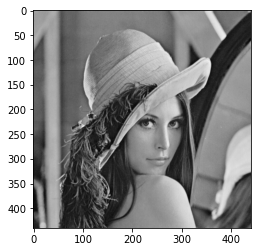

In [7]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'

image = url_to_image(img_url, gray = True)
print('image.shape:', image.shape)

plt.imshow(image, cmap = 'gray')
plt.show()

### 필터연산 적용

output size: 438


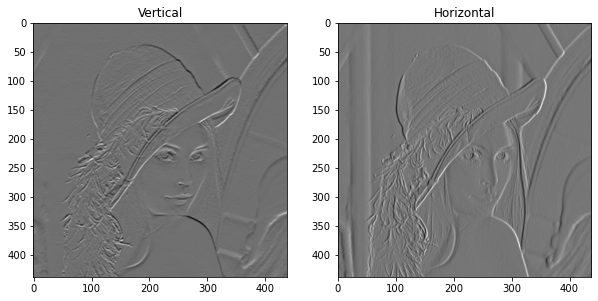

In [8]:
vertical_filter = np.array([[1., 2., 1.], 
                           [0., 0., 0.],
                           [-1., -2., -1.]])
horizontal_filter = np.array([[1., 0., -1.],
                             [2., 0., -2.],
                             [1., 0., -1.]])

output_size = int((image.shape[0] - 3) / 1 + 1)
print('output size:', output_size)

vertical_filtered = filtered_image(image, vertical_filter, output_size)
horizontal_filtered = filtered_image(image, horizontal_filter, output_size)

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.title('Vertical')
plt.imshow(vertical_filtered, cmap = 'gray')

plt.subplot(1, 2, 2)
plt.title('Horizontal')
plt.imshow(horizontal_filtered, cmap = 'gray')

plt.show()

### 이미지 필터를 적용한 최종 결과

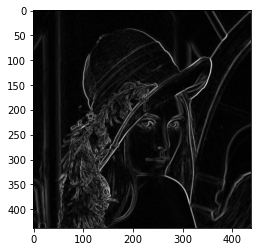

In [14]:
sobel_img = np.sqrt(np.square(horizontal_filtered) + np.square(vertical_filtered))

plt.imshow(sobel_img, cmap = 'gray');

## 3차원 데이터의 합성곱 연산
- **이미지는 3차원으로 구성**
  - (가로, 세로, 채널 수)
  - 채널 : RGB (red, green, blue)

- 색상값의 정도에 따라 color색 결정

  <img src="https://www.projectorcentral.com/images/articles/RGB-Explained-600.jpg">

  <sub>출처: https://www.projectorcentral.com/All-About-Bit-Depth.htm?page=What-Bit-Depth-Looks-Like</sub>

### 아래의 이미지 확인은 참고사항

image.shape: (440, 440, 3)


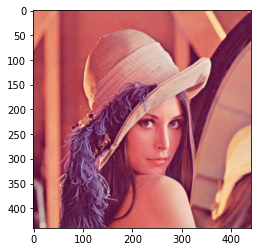

In [16]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'

image = url_to_image(img_url)
print('image.shape:', image.shape)

plt.imshow(image)
plt.show()

## channel 값 : 3차원의 array 

In [17]:
image_copy = image.copy()

# green > red
image_copy[:, :, 1] = 0
# blue > red
image_copy[:, :, 2] = 0
image_red = image_copy

In [18]:
print(image_red)

[[[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [233   0   0]
  [224   0   0]
  [202   0   0]]

 [[226   0   0]
  [225   0   0]
  [222   0   0]
  ...
  [232   0   0]
  [223   0   0]
  [201   0   0]]

 ...

 [[ 84   0   0]
  [ 86   0   0]
  [ 93   0   0]
  ...
  [174   0   0]
  [169   0   0]
  [172   0   0]]

 [[ 82   0   0]
  [ 86   0   0]
  [ 95   0   0]
  ...
  [177   0   0]
  [178   0   0]
  [183   0   0]]

 [[ 81   0   0]
  [ 86   0   0]
  [ 96   0   0]
  ...
  [178   0   0]
  [181   0   0]
  [185   0   0]]]


In [19]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 2] = 0
image_green = image_copy

In [20]:
image_copy = image.copy()
image_copy[:, :, 0] = 0
image_copy[:, :, 1] = 0
image_blue = image_copy

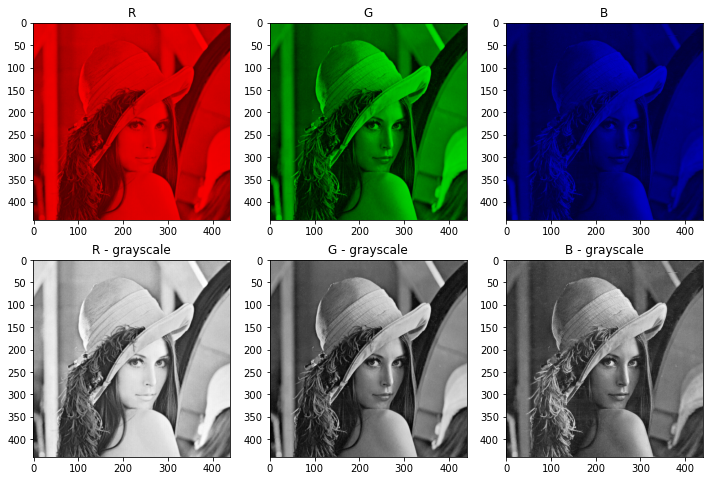

In [21]:
fig = plt.figure(figsize = (12, 8))

title_list = ['R', 'G', 'B',
             'R - grayscale', 'G - grayscale', 'B - grayscale']
image_list = [image_red, image_green, image_blue,
             image_red[:, :, 0], image_green[:, :, 1], image_blue[:, :, 2]]
for i, image in enumerate(image_list):
    ax = fig.add_subplot(2, 3, i+1)
    ax.title.set_text("{}".format(title_list[i]))
    
    if i >= 3:
        plt.imshow(image, cmap = 'gray')
    else:
        plt.imshow(image)
        
plt.show()

### 연산 과정

- 각 채널마다 컨볼루션 연산을 적용
  - 3채널을 모두 합쳐서 '하나의 필터'라고 칭함  
    
  <img src="https://miro.medium.com/max/2000/1*8dx6nxpUh2JqvYWPadTwMQ.gif" width="600">

<br>

- 각각의 결과를 더함  
  
  <img src="https://miro.medium.com/max/2000/1*CYB2dyR3EhFs1xNLK8ewiA.gif" width="600">

<br>

- 더한 결과에 편향을 더함  
  <img src="https://miro.medium.com/max/588/1*RYYucIh3U-YFxrIkyQKzRw.gif" width="300">

  <sub>출처: https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1</sub>



### modules import

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib
import requests
from io import BytesIO

### util functions

In [8]:
def url_to_image(url, gray = False):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype = 'uint8')
    
    if gray == True:
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    else:
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    return image


def conv_op(image, kernel, pad = 0, stride = 1):
    
    H, W, C = image.shape
    kernel_size = kernel.shape[0]
    
    out_h = (H + 2*pad - kernel_size) // stride + 1
    out_w = (W + 2*pad - kernel_size) // stride + 1
    
    filtered_img = np.zeros((out_h, out_w))
    img = np.pad(image, [(pad, pad), (pad, pad), (0, 0)], 'constant')
    
    for i in range(out_h):
        for j in range(out_w):
            for c in range(C):
                multiply_values = image[i:(i + kernel_size), j:(J + kernel_size), c] * kernel
                sum_value = np.sum(multiply_values)
                
                filtered_img[i, j] += sum_value
                
    filtered_img = filtered_img.reshape(1, out_h, out_w, -1).transpose(0, 3, 1, 2)
    
    return filtered_img.astype(np.uint8)

### 이미지 확인

image.shape: (440, 440, 3)


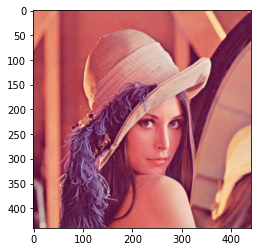

In [23]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'

image = url_to_image(img_url)
print('image.shape:', image.shape)

plt.imshow(image)
plt.show()

### 필터연산 적용
- 3x3 크기의 3채널 필터 5개

- (5, 3, 3, 3) ----> (5개, 3채널, 세로, 가로)

In [24]:
filter1 = np.random.randn(3, 3, 3)

print(filter1.shape)
print(filter1)

(3, 3, 3)
[[[-0.97211805 -2.44664983  0.38188288]
  [ 0.1831317   0.50491918 -0.54200591]
  [ 0.53388952  0.16390198 -0.32155816]]

 [[-0.27692721 -0.51493732  0.18095061]
  [ 0.81756713 -2.03249609 -1.22221392]
  [ 0.31187232 -0.66095321 -0.27760494]]

 [[-1.40530273  1.56102853  0.01878231]
  [ 1.142599    0.87876583 -0.81929625]
  [-0.5257544  -1.14783633 -0.16811669]]]


### 필터연산을 적용한 최종 결과

### 전체 과정 한번에 보기

# 합성곱 신경망 구현
- 참고: 밑바닥부터 시작하는 딥러닝1

## 합성곱 층(Convolution Layer)

In [12]:
def im2col(input_data, filter_h, filter_w, stride = 1, pad = 0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1
    
    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
    
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
                
    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

def col2im(col, input_shape, filter_h, filter_w, stride = 1, pad = 0 ):
    
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
    
    img = np.zeros(N, C, H + 2*pad + stride -1, W + 2*pad + stride - 1)
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]
                
    return img[:, :, pad:H + pad, pad:W + pad]

In [13]:
class Conv2D:
    def __init__(self, W, b, stride = 1, pad = 0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
        self.input_data = None
        self.col = None
        self.col_W = None
        
        self.dW = None
        self.db = None
        
    def forward(self, input_data):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = input_data.shape
        out_h = (H + 2*self.pad - FH) // self.stride + 1
        out_w = (W + 2*self.pad - FW) // self.stride + 1
        
        col = im2col(input_data, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        
        out = np.dot(col, col_W) + self.b
        output = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        self.input_data = input_data
        self.col = col
        self.col_W = col_W
        
        return output
    
    def backward(self, dout):
        FN, C, FH, FW = self.W.shape
        dout = dout.transpose(0, 2, 3, 1).reshape(-1, FN)
        
        self.db = np.sum(dout, axis = 0)
        self.dW = np.dot(self.col.T, dout)
        self.dW = self.dW.transpose(1, 0).reshape(FN, C, FH, FW)
        
        dcol = np.dot(dout, self.col_W.T)
        dx = col2im(dcol, self.input_data.shape, FH, FW, self.stride, self.pad)
        
        return dx

### 컨볼루션 레이어 테스트

In [14]:
def init_weight(num_filters, data_dim, kernel_size, stride = 1, pad = 0, weight_std = 0.01):
    
    weights = weight_std * np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
    biases = np.zeros(num_filters)
    
    return weights, biases

image.shape: (440, 440, 3)


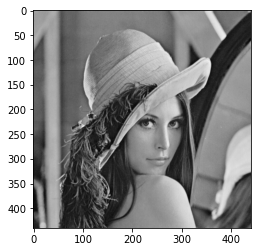

In [15]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'
image_gray = url_to_image(img_url, gray = True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print('image.shape:', image.shape)

image_gray = np.expand_dims(image_gray.transpose(2, 0, 1), axis = 0)

plt.imshow(image_gray[0, 0, :, :], cmap = 'gray')
plt.show()

Conv Layer size: (1, 1, 438, 438)


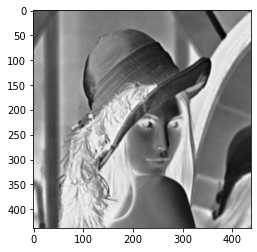

In [16]:
W, b = init_weight(1,1,3)
conv = Conv2D(W, b)
output = conv.forward(image_gray)

print('Conv Layer size:', output.shape)

plt.imshow(output[0, 0, :, :], cmap = 'gray')
plt.show()

Conv Layer size: (1, 1, 438, 438)


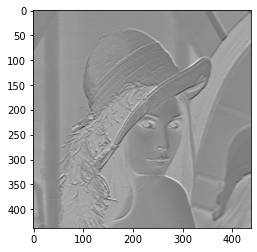

In [17]:
W2, b2 = init_weight(1,1,3, stride = 2)
conv2 = Conv2D(W2, b2)
output2 = conv2.forward(image_gray)

print('Conv Layer size:', output2.shape)

plt.imshow(output2[0, 0, :, :], cmap = 'gray')
plt.show()

image.shape: (440, 440, 3)


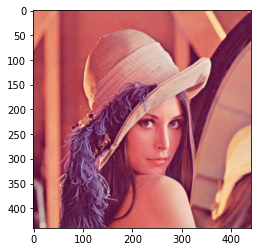

image.shape: (1, 3, 440, 440)


In [18]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'
image_color = url_to_image(img_url)
print('image.shape:', image_color.shape)

plt.imshow(image_color)
plt.show()

image_color = np.expand_dims(image_color.transpose(2, 0, 1), axis = 0)
print('image.shape:', image_color.shape)

Conv Layer size: (1, 10, 438, 438)


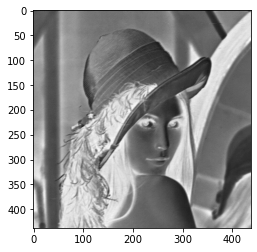

In [22]:
W3, b3 = init_weight(10, 3, 3)
conv3 = Conv2D(W3, b3)
output3 = conv3.forward(image_color)

print('Conv Layer size:', output3.shape)

plt.imshow(output3[0, 3, :, :], cmap = 'gray')
plt.show()

### 동일한 이미지 여러 장 테스트 (배치 처리)

In [ ]:
img_url = 'https://upload.wikimedia.org/wikipedia/ko/thumb/2/24/Lenna.png/440px-Lenna.png'
image_gray = url_to_image(img_url, gray = True)
image_gray = image_gray.reshape(image_gray.shape[0], -1, 1)
print('image.shape:', image.shape)

image_gray = image_gray.transpose(2, 0, 1)
print('image_gray.shape:', image_gray.shape)

### 동일한 이미지 배치처리(color)

## 풀링 층(Pooling Layer)

In [23]:
class Pooling2D:
    def __init__(self, kernel_size = 2, stride = 1, pad = 0):
        self.kernel_size = kernel_size
        self.stride = stride
        self.pad = pad
        
        self.input_data = None
        self.arg_max = None
        
    def forward(self, input_data):
        N, C, H, W = input_data.shape
        out_h = (H - self.kernel_size) // self.stride + 1
        out_w = (W - self.kernel_size) // self.stride + 1
        
        col = im2col(input_data, self.kernel_size, self.kernel_size, self.stride, self.pad)
        col = col.reshape(-1, self.kernel_size * self.kernel_size)
        
        arg_max = np.argmax(col, axis = 1)
        out = np.max(col, axis = 1)
        output = out.reshape(N, out_h, out_w, C).transpose(0, 3, 1, 2)
        
        self.input_data = input_data
        self.arg_max = arg_max
        
        return output
    
    def backward(self, dout):
        dout = dout.transpose(0, 2, 3, 1)
        
        pool_size = self.kernel_size * self.kernel_size
        dmax = np.zeros((dout.size, pool_size))
        dmax[np.arange(self.arg_max.size), self.arg_max.flatten()] = dout.flatten()
        dmax = dmax.reshape(dout.shape + (pool_size,))
        
        dcol = dmax.reshape(dmax.shape[0] * dmax.shape[1] * dmax.shape[2], -1)
        dx = col2im(dcol, self.input_data.shape, self.kernel_size, self.kernel_size, self.stride, self.pad)
        
        return dx

### 풀링 레이어 테스트
- 2차원 이미지
  - (Height, Width, 1)

### 동일한 이미지 배치처리
- Color Image

- conv --> maxpooling --> conv --> maxpooling

- 시각화 과정
  - 5번째 이미지
  - [2, 5, 9] 필터를 통해 확인

# 대표적인 CNN 모델 소개

## LeNet - 5

<img src="https://miro.medium.com/max/4308/1*1TI1aGBZ4dybR6__DI9dzA.png">
  
  <center>[LeNet-5 구조]</center>

  <sub>출처: https://medium.com/@pechyonkin/key-deep-learning-architectures-lenet-5-6fc3c59e6f4</sub>

## AlexNet

- 활성화 함수로 **ReLU** 사용

- 국소적 정규화(Local Response normalization, LRN) 실시하는 계층 사용

- 드롭아웃

  <img src="https://miro.medium.com/proxy/1*qyc21qM0oxWEuRaj-XJKcw.png" width="800">

  <center>[AlexNet 구조]</center>

  <sub>출처: http://www.cs.toronto.edu/~hinton/absps/imagenet.pdf</sub>

## VGG - 16

- 모든 컨볼루션 레이어에서의 필터(커널) 사이즈를 **3x3**으로 설정

- 2x2 MaxPooling

- 필터의 개수는 Conv Block을 지나가면서 2배씩 증가  
  32 -> 64 -> 128

  <br>

  <img src="https://www.researchgate.net/profile/Jose_Cano31/publication/327070011/figure/fig1/AS:660549306159105@1534498635256/VGG-16-neural-network-architecture.png" width="800">

  <center>[VGG-16 구조]</center>

  <sub>출처: Very Deep Convolutional Networks for Large-Scale Image Recognition</sub>

# CNN 학습 구현 - MNIST

## modules import

In [28]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

## Util Functions

In [79]:
def im2col(input_data, filter_h, filter_w, stride = 1, pad = 0):
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1
    
    img = np.pad(input_data, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))
    
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
                
    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)
    return col

def col2im(col, input_shape, filter_h, filter_w, stride = 1, pad = 0 ):
    
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h) // stride + 1
    out_w = (W + 2*pad - filter_w) // stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)
    
    img = np.zeros((N, C, H + 2*pad + stride -1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride * out_h
        for x in range(filter_w):
            x_max = x + stride * out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]
                
    return img[:, :, pad:H + pad, pad:W + pad]

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis = 0)
        y = np.exp(x) / np.sum(np.exp(x), axis = 0)
        return y.T
    
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def mean_squared_error(pred_y, true_y):
    return 0.5 * np.sum((pred_y - true_y)**2)

def cross_entropy_error(pred_y, true_y):
    if pred_y.ndim == 1:
        true_y = true_y.reshape(1, true_y.size)
        pred_y = pred_y.reshape(1, pred_y.size)
        
    if true_y.size == pred_y.size:
        true_y = true_y.argmax(axis = 1)
        
    batch_size = pred_y.shape[0]
    return -np.sum(np.log(pred_y[np.arange(batch_size), true_y] + 1e-7)) / batch_size

def softmax_loss(X, true_y):
    pred_y = softmax(X)
    return cross_entropy_error(pred_y, true_y)

## Util Classes

In [80]:
class ReLU:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        
        return dx
    

class Sigmoid:
    def __init__(self):
        self.out = None
            
    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out
        
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
            
        return dx
        
class Layer:
    def __init__(self, W, b):
        self.W = W
        self.b = b
            
        self.input_data = None
        self.input_data_shape = None
            
        self.dW = None
        self.db = None
            
    def forward(self, input_data):
        self.input_data_shape = input_data.shape
        input_data = input_data.reshape(input_data.shape[0], -1)
        self.input_data = input_data
            
        out = np.dot(self.input_data, self.W) + self.b
            
        return out
        
    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.input_data.T, dout)
        self.db = np.sum(dout, axis = 0)
            
        dx = dx.reshape(*self.input_data_shape)
        return dx
        
class Softmax:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None
            
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
            
        return self.loss
        
    def backward(self, dout = 1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size:
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
                
        return dx

In [81]:
class SGD:
    def __init__(self, learning_rate = 0.01):
        self.learning_rate = learning_rate
        
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.learning_rate * grads[key]

## 데이터 로드

In [82]:
np.random.seed(42)

mnist = tf.keras.datasets.mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()
num_classes = 10

In [83]:
x_train, x_test = np.expand_dims(x_train, axis = 1), np.expand_dims(x_test, axis = 1)

In [84]:
x_train = x_train[:3000]
x_test = x_test[:500]
t_train = t_train[:3000]
t_test = t_test[:500]

## Build Model

In [85]:
class MyModel:
    
    def __init__(self, input_dim = (1, 28, 28), num_outputs = 10):
        conv1_block = {'num_filters' : 30,
                      'kernel_size' : 3,
                      'stride' : 1,
                      'pad' : 0}
        
        input_size = input_dim[1]
        conv_output_size = ((input_size - conv1_block['kernel_size'] + 2*conv1_block['pad']) // conv1_block['stride']) + 1
        pool_output_size = int(conv1_block['num_filters'] * (conv_output_size/2) * (conv_output_size/2))
        
        self.params = {}
        self.params['W1'], self.params['b1'] = self.__init_weights_conv(conv1_block['num_filters'], input_dim[0], 3)
        self.params['W2'], self.params['b2'] = self.__init_weights_fc(pool_output_size, 256)
        self.params['W3'], self.params['b3'] = self.__init_weights_fc(256, 10)
        
        self.layers = OrderedDict()
        self.layers['Conv1'] = Conv2D(self.params['W1'], self.params['b1'])
        self.layers['ReLU1'] = ReLU()
        self.layers['Pool1'] = Pooling2D(kernel_size = 2, stride = 2)
        self.layers['FC1'] = Layer(self.params['W2'], self.params['b2'])
        self.layers['ReLU'] = ReLU()
        self.layers['FC2'] = Layer(self.params['W3'], self.params['b3'])
        self.last_layer = Softmax()
        
    def __init_weights_conv(self, num_filters, data_dim, kernel_size, stride = 1, pad = 0, weight_std = 0.01):
        weights = weight_std * np.random.randn(num_filters, data_dim, kernel_size, kernel_size)
        biases = np.zeros(num_filters)
        return weights, biases
    
    def __init_weights_fc(self, num_inputs, num_outputs, weight_std = 0.01):
        weights = weight_std * np.random.randn(num_inputs, num_outputs)
        biases = np.zeros(num_outputs)
        return weights, biases
    
    def forward(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
            
        return x
    
    def loss(self, x, true_y):
        pred_y = self.forward(x)
        return self.last_layer.forward(pred_y, true_y)
    
    def accuracy(self, x, true_y, batch_size = 100):
        if true_y.ndim != 1:
            true_y = np.argmax(true_y, axis = 1)
            
        accuracy = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = true_y[i*batch_size:(i+1)*batch_size]
            y = self.forward(tx)
            y = np.argmax(y, axis = 1)
            accuracy += np.sum(y == tt)
            
        return accuracy / x.shape[0]
    
    def gradient(self, x, true_y):
        
        self.loss(x, true_y)
        
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
            
        
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['FC1'].dW, self.layers['FC1'].db
        grads['W3'], grads['b3'] = self.layers['FC2'].dW, self.layers['FC2'].db
        
        return grads

## Hyper Parameters

In [86]:
epochs = 10
train_size = x_train.shape[0]
batch_size = 200
learning_rate = 0.001
current_iter = 0

iter_per_epoch = max(train_size // batch_size, 1)

In [87]:
train_loss_list = []
train_acc_list = []
test_acc_list = []

## 모델 생성 및 학습

In [88]:
model = MyModel()
model.params.keys()

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])

In [89]:
optimizer = SGD(learning_rate)

In [91]:
for epoch in range(epochs):
    for i in range(iter_per_epoch):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
        
        grads = model.gradient(x_batch, t_batch)
        optimizer.update(model.params, grads)
        
        loss = model.loss(x_batch, t_batch)
        train_loss_list.append(loss)
        
        x_train_sample, t_train_sample = x_train, t_train
        x_test_sample, t_test_sample = x_test, t_test
        
        train_acc = model.accuracy(x_train_sample, t_train_sample)
        test_acc = model.accuracy(x_test_sample, t_test_sample)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        current_iter += 1
        
    print('Epoch: {} Train Loss: {:.4f}  Train Accuracy: {:.4f}  Test Accuracy: {:.4f}'.format(epoch + 1, loss, train_acc, test_acc))

Epoch: 1 Train Loss: 2.0506  Train Accuracy: 0.4343  Test Accuracy: 0.4080
Epoch: 2 Train Loss: 1.4866  Train Accuracy: 0.6637  Test Accuracy: 0.6100
Epoch: 3 Train Loss: 0.8645  Train Accuracy: 0.7967  Test Accuracy: 0.7440
Epoch: 4 Train Loss: 0.6309  Train Accuracy: 0.8420  Test Accuracy: 0.7900
Epoch: 5 Train Loss: 0.4116  Train Accuracy: 0.8600  Test Accuracy: 0.8180
Epoch: 6 Train Loss: 0.4533  Train Accuracy: 0.8720  Test Accuracy: 0.8340
Epoch: 7 Train Loss: 0.4085  Train Accuracy: 0.8923  Test Accuracy: 0.8580
Epoch: 8 Train Loss: 0.3497  Train Accuracy: 0.9010  Test Accuracy: 0.8680
Epoch: 9 Train Loss: 0.3601  Train Accuracy: 0.9040  Test Accuracy: 0.8640
Epoch: 10 Train Loss: 0.2798  Train Accuracy: 0.9110  Test Accuracy: 0.8680


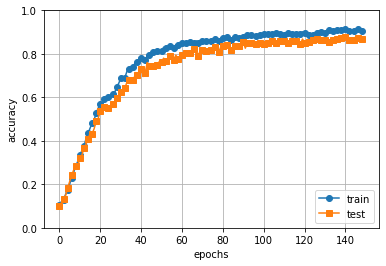

In [92]:
x = np.arange(current_iter)
plt.plot(x, train_acc_list, marker = 'o', label = 'train', markevery = 2)
plt.plot(x, test_acc_list, marker = 's', label = 'test', markevery = 2)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc = 'lower right')
plt.show()

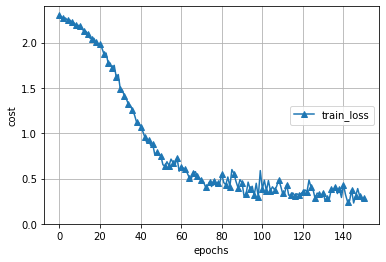

In [93]:
# Train Loss 값 출력

x = np.arange(current_iter + 1)
plt.plot(x, train_loss_list, marker = '^', label = 'train_loss', markevery = 2)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('cost')
plt.ylim(0, 2.4)
plt.legend(loc = 'right')
plt.show()

### 생각보다 학습이 잘 되지 않았던 이유
- 학습 데이터의 수 부족
  - 학습 시간고려

- FC Layer의 노드수가 적절했는지

- 학습률(learning rate)값이 적절했는지

- ...

## 어떠한 조건에서 가장 좋은 결과를 내는지는 값을 **적절히** 바꾸어 시도해보아야함